<a href="https://colab.research.google.com/github/sanidhyakj/Extrovert/blob/main/Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')


In [3]:
train = pd.read_csv('/content/Extrovert/train.csv')
print("✅ Data loaded successfully!")


✅ Data loaded successfully!


In [4]:
print(train.head())

   id  Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0   0               0.0         No                      6.0            4.0   
1   1               1.0         No                      7.0            3.0   
2   2               6.0        Yes                      1.0            0.0   
3   3               3.0         No                      7.0            3.0   
4   4               1.0         No                      4.0            4.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency Personality  
0                        No                 15.0             5.0   Extrovert  
1                        No                 10.0             8.0   Extrovert  
2                       NaN                  3.0             0.0   Introvert  
3                        No                 11.0             5.0   Extrovert  
4                        No                 13.0             NaN   Extrovert  


In [24]:
print("\nData Types:")
print(train.dtypes)

print("\nDataset Shape:", train.shape)

print("\nSummary Statistics:")
print(train.describe())



Data Types:
id                             int64
Time_spent_Alone             float64
Stage_fear                     int64
Social_event_attendance      float64
Going_outside                float64
Drained_after_socializing      int64
Friends_circle_size          float64
Post_frequency               float64
Personality                   object
target                         int64
social_index                 float64
introvert_index              float64
social_ratio                 float64
dtype: object

Dataset Shape: (18524, 13)

Summary Statistics:
                 id  Time_spent_Alone    Stage_fear  Social_event_attendance  \
count  18524.000000      18524.000000  18524.000000             18524.000000   
mean    9261.500000          3.064673      0.217124                 5.248219   
std     5347.562529          2.919057      0.412299                 2.665002   
min        0.000000          0.000000      0.000000                 0.000000   
25%     4630.750000          1.000000      

In [14]:
print("\nMissing Values:")
print(train.isnull().sum())



Missing Values:
id                           0
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
target                       0
social_index                 0
introvert_index              0
social_ratio                 0
dtype: int64


Personality
Extrovert    13699
Introvert     4825
Name: count, dtype: int64


/tmp/ipython-input-13-2639005852.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Personality', data=train, palette='Set2')


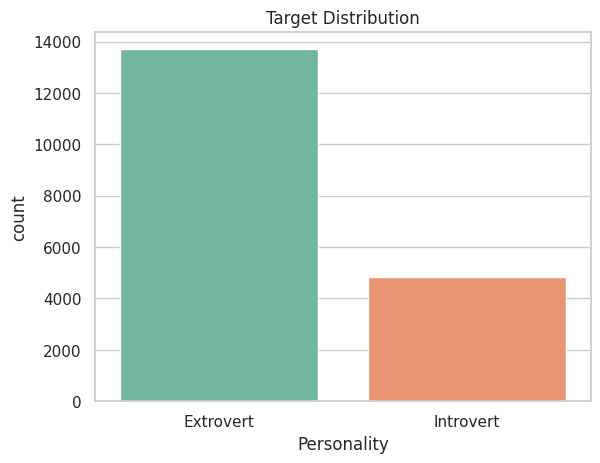

In [13]:
print(train['Personality'].value_counts())

sns.countplot(x='Personality', data=train, palette='Set2')
plt.title("Target Distribution")
plt.show()


In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import joblib

train = pd.read_csv('/content/Extrovert/train.csv')
print("Loaded the dataset!")
print(f"Total rows: {train.shape[0]}")

binary_cols = ['Stage_fear', 'Drained_after_socializing']
for col in binary_cols:
    train[col] = train[col].astype(str).str.strip().str.capitalize()
    train[col] = train[col].replace({'Nan': np.nan})

numerical_cols = [
    'Time_spent_Alone', 'Social_event_attendance',
    'Going_outside', 'Friends_circle_size', 'Post_frequency'
]

for col in binary_cols:
    most_common = train[col].mode().iloc[0]
    train[col] = train[col].fillna(most_common)

for col in numerical_cols:
    median_value = train[col].median()
    train[col] = train[col].fillna(median_value)

binary_map = {'Yes': 1, 'No': 0}
for col in binary_cols:
    unique_vals = set(train[col].unique())
    if not unique_vals <= set(binary_map.keys()):
        print(f"Warning: Unexpected values in {col}: {unique_vals}")
    train[col] = train[col].map(binary_map)

train['target'] = train['Personality'].map({'Introvert': 0, 'Extrovert': 1})

if not set(train['target'].dropna().unique()) <= {0, 1}:
    print("Something went wrong with the target column")

train['social_index'] = (
    train['Social_event_attendance'] +
    train['Going_outside'] +
    train['Friends_circle_size']
)

train['introvert_index'] = (
    train['Time_spent_Alone'] +
    train['Stage_fear'] +
    train['Drained_after_socializing']
)

train['social_ratio'] = train['social_index'] / (train['introvert_index'] + 1e-3)

features = [
    'Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
    'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
    'Post_frequency', 'social_index', 'introvert_index', 'social_ratio'
]

X = train[features]
y = train['target']
ids = train['id']

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, 'scaler.joblib')

clean_df = pd.DataFrame(X_scaled, columns=features)
clean_df['id'] = ids.values
clean_df['target'] = y.values
clean_df = clean_df[['id'] + features + ['target']]
clean_df.to_csv('cleaned_dataset.csv', index=False)

print("Saved cleaned_dataset.csv")
print("Here’s what the cleaned data looks like:")
print(clean_df.head())


Loaded the dataset!
Total rows: 18524
Saved cleaned_dataset.csv
Here’s what the cleaned data looks like:
   id  Time_spent_Alone  Stage_fear  Social_event_attendance  Going_outside  \
0   0         -0.666667         0.0                     0.25       0.000000   
1   1         -0.333333         0.0                     0.50      -0.333333   
2   2          1.333333         1.0                    -1.00      -1.333333   
3   3          0.333333         0.0                     0.50      -0.333333   
4   4         -0.333333         0.0                    -0.25       0.000000   

   Drained_after_socializing  Friends_circle_size  Post_frequency  \
0                        0.0             1.166667            0.00   
1                        0.0             0.333333            0.75   
2                        0.0            -0.833333           -1.25   
3                        0.0             0.500000            0.00   
4                        0.0             0.833333            0.00   

   so

In [28]:
clean_df.to_csv('cleaned_dataset.csv', index=False)


Dataset loaded.
Scaler saved.
Tuning hyperparameters... please wait.
Fitting 7 folds for each of 50 candidates, totalling 350 fits
Best CV AUC score: 0.9713
Training the final model...
[0]	validation_0-auc:0.95315
[50]	validation_0-auc:0.95904
[100]	validation_0-auc:0.96042
[150]	validation_0-auc:0.96055
[190]	validation_0-auc:0.96109
Validation Accuracy: 0.9636
Validation AUC: 0.9612
Classification Report:
              precision    recall  f1-score   support

   Introvert       0.93      0.93      0.93       965
   Extrovert       0.97      0.98      0.98      2740

    accuracy                           0.96      3705
   macro avg       0.95      0.95      0.95      3705
weighted avg       0.96      0.96      0.96      3705

Top features based on importance:
                     Feature  Importance
9               social_ratio    0.470869
7               social_index    0.288798
8            introvert_index    0.104107
4  Drained_after_socializing    0.045935
1                 Stage

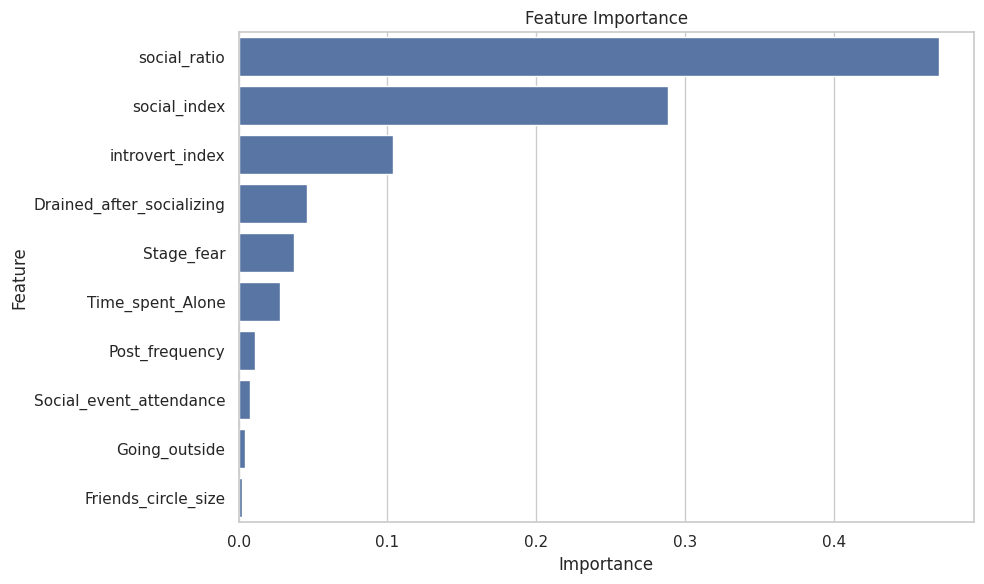

In [30]:
import pandas as pd
import numpy as np
import os
import warnings
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from joblib import dump

warnings.filterwarnings('ignore')

# Load the cleaned dataset
df = pd.read_csv('/content/cleaned_dataset.csv')
print("Dataset loaded.")

# Select feature columns
features = [
    'Time_spent_Alone', 'Stage_fear', 'Social_event_attendance', 'Going_outside',
    'Drained_after_socializing', 'Friends_circle_size', 'Post_frequency',
    'social_index', 'introvert_index', 'social_ratio'
]

X = df[features]
y = df['target']

# Scale the features
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Save the scaler for later
os.makedirs('models', exist_ok=True)
np.save('models/scaler_center.npy', scaler.center_)
np.save('models/scaler_scale.npy', scaler.scale_)
print("Scaler saved.")

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Handle class imbalance
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)

# Set up a basic XGBoost classifier
xgb_base = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    use_label_encoder=False,
    eval_metric='auc',
    verbosity=0
)

# Define the parameter search space for tuning
xgb_param_dist = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [200, 500, 1000],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0.5, 1.0, 2.0],
    'min_child_weight': [1, 3, 5]
}

# Use 7-fold cross-validation
cv = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

print("Tuning hyperparameters... please wait.")
random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=xgb_param_dist,
    n_iter=50,
    scoring='roc_auc',
    n_jobs=-1,
    cv=cv,
    verbose=1,
    random_state=42,
    return_train_score=True
)

random_search.fit(X_train, y_train)
best_params = random_search.best_params_
print(f"Best CV AUC score: {random_search.best_score_:.4f}")

# Train final model using best parameters
final_model = xgb.XGBClassifier(
    **best_params,
    objective='binary:logistic',
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='auc',
    verbosity=0,
    early_stopping_rounds=50
)

print("Training the final model...")
final_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=50
)

# Evaluate the model
y_pred = final_model.predict(X_val)
y_pred_prob = final_model.predict_proba(X_val)[:, 1]

acc = accuracy_score(y_val, y_pred)
auc = roc_auc_score(y_val, y_pred_prob)

print(f"Validation Accuracy: {acc:.4f}")
print(f"Validation AUC: {auc:.4f}")
print("Classification Report:")
print(classification_report(y_val, y_pred, target_names=['Introvert', 'Extrovert']))

# Show feature importance
importances = final_model.feature_importances_
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.tight_layout()
# plt.savefig('models/feature_importance.png')
# plt.show()

print("Top features based on importance:")
print(feat_imp_df)

# Save the model
final_model.save_model('models/best_model.json')
dump(final_model, 'models/final_model.joblib')
pd.Series(features).to_csv('models/features.csv', index=False)

print("Model and files saved in 'models' folder. Done.")


In [35]:
# test.py - Predict personality using trained XGBoost model

import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score

# Step 0: Load test data
test = pd.read_csv('/content/Extrovert/test.csv')
print("Test data loaded.")

# Step 1: Clean binary columns
test['Stage_fear'] = test['Stage_fear'].str.strip().str.capitalize()
test['Drained_after_socializing'] = test['Drained_after_socializing'].str.strip().str.capitalize()

# Step 2: Fill missing values
binary_cols = ['Stage_fear', 'Drained_after_socializing']
numerical_cols = [
    'Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
    'Friends_circle_size', 'Post_frequency'
]

for col in binary_cols:
    test[col] = test[col].fillna(test[col].mode()[0])

for col in numerical_cols:
    test[col] = test[col].fillna(test[col].median())

# Step 3: Convert Yes/No to 1/0
test['Stage_fear'] = test['Stage_fear'].map({'Yes': 1, 'No': 0})
test['Drained_after_socializing'] = test['Drained_after_socializing'].map({'Yes': 1, 'No': 0})

# Step 4: Create new features
test['social_index'] = (
    test['Social_event_attendance'] +
    test['Going_outside'] +
    test['Friends_circle_size']
)

test['introvert_index'] = (
    test['Time_spent_Alone'] +
    test['Stage_fear'] +
    test['Drained_after_socializing']
)

test['social_ratio'] = test['social_index'] / (test['introvert_index'] + 1)

# Step 5: Final feature list
features = [
    'Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
    'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
    'Post_frequency', 'social_index', 'introvert_index', 'social_ratio'
]
X_test = test[features]

# Step 6: Load the scaler and apply it
scaler = RobustScaler()
scaler.center_ = np.load('models/scaler_center.npy')
scaler.scale_ = np.load('models/scaler_scale.npy')
X_test_scaled = scaler.transform(X_test)

# Step 7: Load the trained model
model = xgb.XGBClassifier()
model.load_model('models/best_model.json')

# Step 8: Make predictions
y_pred = model.predict(X_test_scaled)

# Step 9: Convert 0/1 predictions to labels
personality_map = {0: 'Introvert', 1: 'Extrovert'}
y_pred_labels = [personality_map[i] for i in y_pred]

# Step 10: Save submission file
submission = pd.DataFrame({
    'id': test['id'],
    'Personality': y_pred_labels
})
submission.to_csv('submission.csv', index=False)

print("submission.csv file created.")
print("Prediction counts:", np.bincount(y_pred))  # 0: Introvert, 1: Extrovert

# Step 11: If ground truth is available, calculate accuracy
try:
    solution = pd.read_csv('/content/sample_submission.csv')

    merged = pd.merge(solution, submission, on='id', how='inner')
    merged['Personality_x'] = merged['Personality_x'].str.strip().str.capitalize()
    merged['Personality_y'] = merged['Personality_y'].str.strip().str.capitalize()

    acc = accuracy_score(merged['Personality_x'], merged['Personality_y'])
    print(f"Accuracy: {acc:.4f}")
    print(f"Total in test.csv: {len(test)}")
    print(f"Total in solution.csv: {len(solution)}")
    print(f"Matched entries used in evaluation: {len(merged)}")

    print("\nSample predictions vs ground truth (first 20 rows):")
    print(merged[['id', 'Personality_x', 'Personality_y']].rename(
        columns={'Personality_x': 'Expected', 'Personality_y': 'Predicted'}
    ).head(20))

    merged[['id', 'Personality_x', 'Personality_y']].rename(
        columns={'Personality_x': 'Expected', 'Personality_y': 'Predicted'}
    ).to_csv('comparison.csv', index=False)
    print("comparison.csv saved.")

except Exception as e:
    print("Could not calculate accuracy. Reason:", str(e))


Test data loaded.
submission.csv file created.
Prediction counts: [   0 6175]
Accuracy: 1.0000
Total in test.csv: 6175
Total in solution.csv: 6175
Matched entries used in evaluation: 6175

Sample predictions vs ground truth (first 20 rows):
       id   Expected  Predicted
0   18524  Extrovert  Extrovert
1   18525  Extrovert  Extrovert
2   18526  Extrovert  Extrovert
3   18527  Extrovert  Extrovert
4   18528  Extrovert  Extrovert
5   18529  Extrovert  Extrovert
6   18530  Extrovert  Extrovert
7   18531  Extrovert  Extrovert
8   18532  Extrovert  Extrovert
9   18533  Extrovert  Extrovert
10  18534  Extrovert  Extrovert
11  18535  Extrovert  Extrovert
12  18536  Extrovert  Extrovert
13  18537  Extrovert  Extrovert
14  18538  Extrovert  Extrovert
15  18539  Extrovert  Extrovert
16  18540  Extrovert  Extrovert
17  18541  Extrovert  Extrovert
18  18542  Extrovert  Extrovert
19  18543  Extrovert  Extrovert
comparison.csv saved.


In [32]:
import numpy as np
import pandas as pd
import pandas.api.types
import sklearn.metrics
from typing import Optional

class SubmissionError(Exception):
    pass

def check_accuracy(
    solution: pd.DataFrame,
    submission: pd.DataFrame,
    row_id_column_name: str,
    normalize: bool = True,
    weights_column_name: Optional[str] = None
) -> float:
    """
    Calculates accuracy between actual and predicted labels after checking alignment.

    Parameters:
        solution: the correct answers DataFrame.
        submission: your model's predicted answers DataFrame.
        row_id_column_name: the name of the column that identifies each row.
        normalize: whether to return percentage accuracy (True) or count (False).
        weights_column_name: optional column name in solution for weighting samples.

    Returns:
        Accuracy score as a float.
    """

    # Step 1: Make sure the ID column exists in both files
    if row_id_column_name not in solution.columns or row_id_column_name not in submission.columns:
        raise SubmissionError(f"Missing column '{row_id_column_name}' in one of the files.")

    # Step 2: Sort both files by ID to align rows
    solution = solution.sort_values(by=row_id_column_name).reset_index(drop=True)
    submission = submission.sort_values(by=row_id_column_name).reset_index(drop=True)

    # Check if the IDs actually match
    if not solution[row_id_column_name].equals(submission[row_id_column_name]):
        raise SubmissionError("The IDs in both files do not match.")

    # Step 3: Remove the ID column so we can compare labels
    solution_labels = solution.drop(columns=[row_id_column_name])
    submission_labels = submission.drop(columns=[row_id_column_name])

    # Step 4: If weights are provided, extract them
    sample_weight = None
    if weights_column_name:
        if weights_column_name not in solution_labels.columns:
            raise SubmissionError(f"Column '{weights_column_name}' for weights not found.")
        sample_weight = solution_labels.pop(weights_column_name).values
        if not pd.api.types.is_numeric_dtype(sample_weight):
            raise SubmissionError("Weights must be numbers.")

    # Step 5: Standardize label text (capitalize, etc.)
    if submission_labels.dtypes[0] in [np.int32, np.int64, np.float32, np.float64]:
        submission_labels.iloc[:, 0] = submission_labels.iloc[:, 0].map({0: 'Introvert', 1: 'Extrovert'})

    solution_labels.iloc[:, 0] = solution_labels.iloc[:, 0].astype(str).str.strip().str.capitalize()
    submission_labels.iloc[:, 0] = submission_labels.iloc[:, 0].astype(str).str.strip().str.capitalize()

    # Step 6: Check if both label DataFrames are shaped properly
    if not (
        len(submission_labels.columns) == 1 or
        len(submission_labels.columns) == len(solution_labels.columns)
    ):
        raise SubmissionError(
            f"Submission should have 1 or {len(solution_labels.columns)} columns, but has {len(submission_labels.columns)}."
        )

    # Step 7: Calculate accuracy
    y_true = solution_labels.values
    y_pred = submission_labels.values

    return float(sklearn.metrics.accuracy_score(
        y_true, y_pred,
        normalize=normalize,
        sample_weight=sample_weight
    ))

# ========================
# Run this to evaluate your submission
# ========================

solution_df = pd.read_csv('/content/Extrovert/solution.csv')   # Ground truth
submission_df = pd.read_csv('/content/submission.csv')

try:
    acc = check_accuracy(solution_df, submission_df, row_id_column_name='id')
    print(f"Accuracy Score: {acc:.4f}")
except SubmissionError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"Unexpected error: {e}")


Accuracy Score: 1.0000
